In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('penguins')
print(df.shape)
df.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.select_dtypes(include='object').describe(include='all')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [4]:
for col in df.select_dtypes(include='object').columns:
  print(f"{df[col].value_counts()}  \n\n")

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64  


Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64  


Male      168
Female    165
Name: sex, dtype: int64  




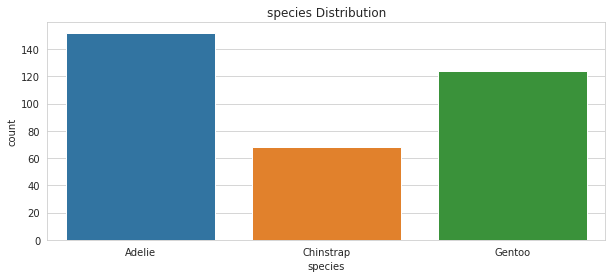

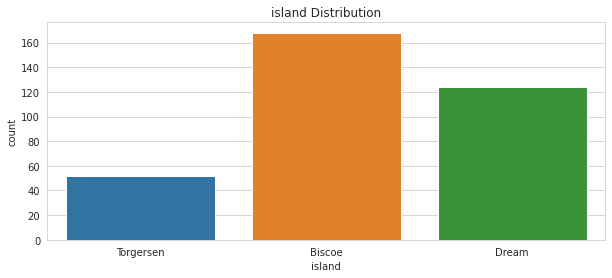

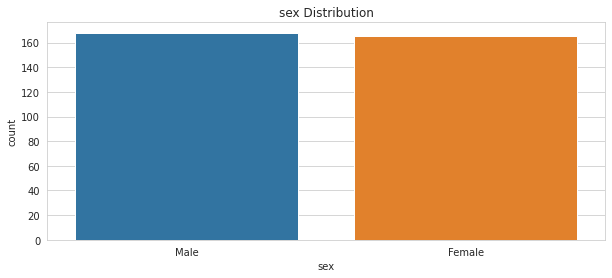

In [5]:
for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(10,4))
  sns.countplot(data=df, x=col)
  plt.title(f"{col} Distribution")
  plt.show()
  print("\n")

In [6]:
df = sns.load_dataset('tips')
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


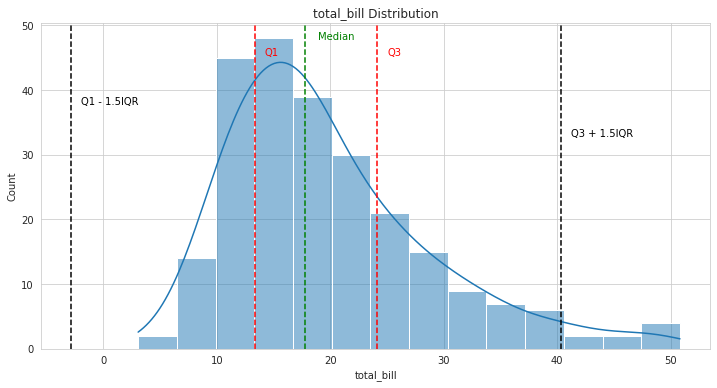

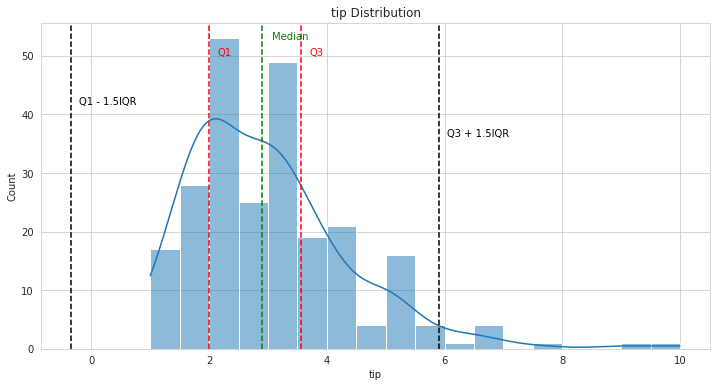

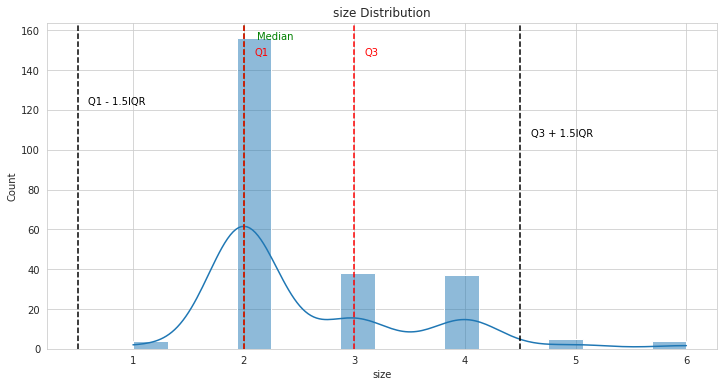

In [7]:
for col in  df.select_dtypes(include='number').columns:

  fig, axes = plt.subplots(figsize=(12,6))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.95, s='Median', fontsize=10, c='g')


  IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)

  plt.axvline(df[col].quantile(q=0.25), color='r', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.25) + df[col].std()/10, y=axes.get_ylim()[1] * 0.90, s="Q1", fontsize=10, c='r')

  plt.axvline(df[col].quantile(q=0.25) - 1.5*IQR, color='k', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.25) - 1.5*IQR + df[col].std()/10, y=axes.get_ylim()[1] * 0.75, s="Q1 - 1.5IQR", fontsize=10, c='k')
  
  plt.axvline(df[col].quantile(q=0.75), color='r', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.75) + df[col].std()/10, y=axes.get_ylim()[1] * 0.90, s="Q3", fontsize=10, c='r')

  plt.axvline(df[col].quantile(q=0.75) + 1.5*IQR, color='k', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.75) + 1.5*IQR + df[col].std()/10, y=axes.get_ylim()[1] * 0.65, s="Q3 + 1.5IQR", fontsize=10, c='k')
  
  plt.show()
  print("\n")

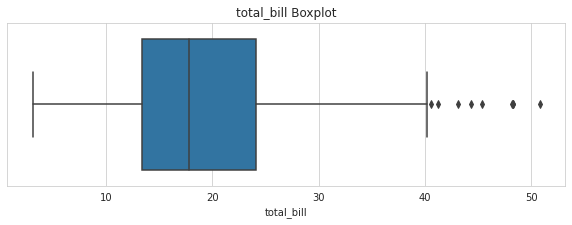

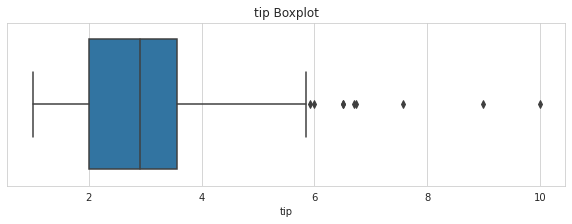

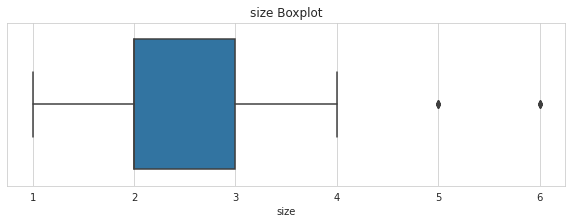

In [8]:
for col in  df.select_dtypes(include='number').columns:
  fig, axes = plt.subplots(figsize=(10,3))
  sns.boxplot(data=df, x=col)

  plt.title(f"{col} Boxplot")
  plt.show()
  print("\n")

In [9]:
df = sns.load_dataset('tips')
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
ser_skew = df.skew() # the result is a Pandas Series, we will append to a DataFrame
ser_skew.name = 'Skewness'

ser_kurt = df.skew() # the result is a Pandas Series, we will append to a DataFrame
ser_kurt.name = 'Kurtosis'

SummaryStats = df.describe(include='all')
SummaryStats = SummaryStats.append(ser_skew).append(ser_kurt)
SummaryStats

/tmp/ipykernel_1961/3510391781.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ser_skew = df.skew() # the result is a Pandas Series, we will append to a DataFrame
/tmp/ipykernel_1961/3510391781.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ser_kurt = df.skew() # the result is a Pandas Series, we will append to a DataFrame
/tmp/ipykernel_1961/3510391781.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SummaryStats = SummaryStats.append(ser_skew).append(ser_kurt)
/tmp/ipykernel_1961/3510391781.py:8: FutureWarning: The frame.append method is deprecated an

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000
